In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
path="D:\Ai\Data Analyst Internn\CognoRise internship\Employee Salaries\ds_salaries.csv"
df_salaries=pd.read_csv(path,index_col="Unnamed: 0",parse_dates=["work_year"],date_format="%Y")

## Explore Data

In [4]:
df_salaries.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020-01-01,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020-01-01,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020-01-01,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020-01-01,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020-01-01,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020-01-01,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,2020-01-01,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,2020-01-01,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,2020-01-01,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,2020-01-01,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [5]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   work_year           607 non-null    datetime64[ns]
 1   experience_level    607 non-null    object        
 2   employment_type     607 non-null    object        
 3   job_title           607 non-null    object        
 4   salary              607 non-null    int64         
 5   salary_currency     607 non-null    object        
 6   salary_in_usd       607 non-null    int64         
 7   employee_residence  607 non-null    object        
 8   remote_ratio        607 non-null    int64         
 9   company_location    607 non-null    object        
 10  company_size        607 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 56.9+ KB


In [6]:
df_salaries.shape

(607, 11)

In [7]:
df_salaries.describe().round(2)

,work_year,salary,salary_in_usd,remote_ratio
count,607,607.00,607.00,607.00
mean,2021-05-28 19:20:03.953871616,324000.06,112297.87,70.92
min,2020-01-01 00:00:00,4000.00,2859.00,0.00
25%,2021-01-01 00:00:00,70000.00,62726.00,50.00
50%,2022-01-01 00:00:00,115000.00,101570.00,100.00
75%,2022-01-01 00:00:00,165000.00,150000.00,100.00
max,2022-01-01 00:00:00,30400000.00,600000.00,100.00
std,NaN,1544357.49,70957.26,40.71


In [8]:
for col in df_salaries.columns :
    print( f"{col} unique values is:\n {df_salaries[col].unique()} \n ---------------- " )
print("job_title numbers :",df_salaries["job_title"].nunique())

work_year unique values is:
 <DatetimeArray>
['2020-01-01 00:00:00', '2021-01-01 00:00:00', '2022-01-01 00:00:00']
Length: 3, dtype: datetime64[ns] 
 ---------------- 
experience_level unique values is:
 ['MI' 'SE' 'EN' 'EX'] 
 ---------------- 
employment_type unique values is:
 ['FT' 'CT' 'PT' 'FL'] 
 ---------------- 
job_title unique values is:
 ['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketin

## handl missing values

In [9]:
df_salaries.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Dealing With Outliers


- ### Visualize Outliers

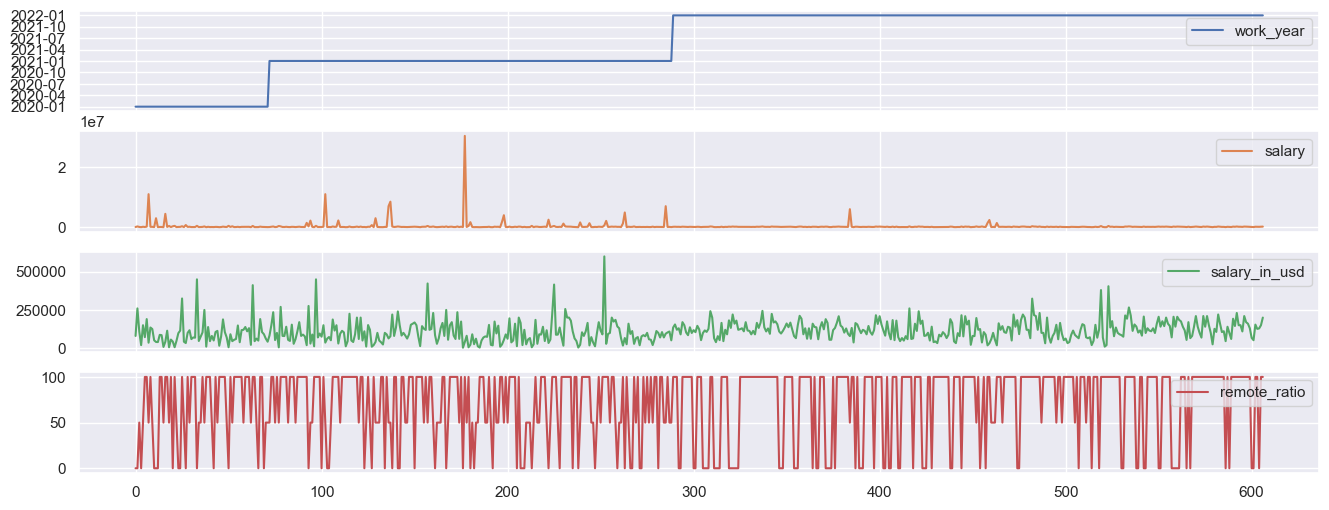

In [10]:
df_salaries.plot(subplots=True,figsize=(16,6))
plt.show()

In [11]:
per25th=df_salaries["salary_in_usd"].quantile(0.25)
print(per25th)
per75th=df_salaries["salary_in_usd"].quantile(0.75)
print(per75th)


62726.0
150000.0


In [12]:
IQR = per75th - per25th

In [13]:
upper =per75th +(IQR*1.5)
lower = per25th - (IQR * 1.5)

print(upper,lower)

280911.0 -68185.0


In [14]:
outli= df_salaries[(df_salaries["salary_in_usd"] > upper) | (df_salaries["salary_in_usd"] < lower)]

In [15]:
df_salaries= df_salaries[~df_salaries.index.isin(outli)]

In [16]:
df_salaries=df_salaries.drop(outli.index)

In [17]:
df_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020-01-01,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020-01-01,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020-01-01,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020-01-01,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020-01-01,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022-01-01,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022-01-01,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022-01-01,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022-01-01,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


## Manipulate Job titles 

In [18]:

df_salaries["correct_job"]=df_salaries.job_title.str.rfind("M")
ML_Engineer=(df_salaries["correct_job"]  >= 0 )
df_salaries.loc[ML_Engineer,"job_title"] ="ML Learning"
print(df_salaries["job_title"].unique())
print("job_title numbers :",df_salaries["job_title"].nunique())


['Data Scientist' 'ML Learning' 'Big Data Engineer' 'Product Data Analyst'
 'Data Analyst' 'Lead Data Scientist' 'Business Data Analyst'
 'Lead Data Engineer' 'Lead Data Analyst' 'Data Engineer'
 'Data Science Consultant' 'BI Data Analyst' 'Research Scientist'
 'AI Scientist' 'Computer Vision Engineer' 'Principal Data Scientist'
 'Head of Data' '3D Computer Vision Researcher' 'Data Analytics Engineer'
 'Applied Data Scientist' 'Director of Data Science' 'Cloud Data Engineer'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer' 'Head of Data Science'
 'Data Specialist' 'Data Architect' 'Finance Data Analyst'
 'Principal Data Analyst' 'Big Data Architect' 'Staff Data Scientist'
 'Analytics Engineer' 'ETL Developer' 'NLP Engineer'
 'Financial Data Analyst']
job_title numbers : 37


In [19]:
df_salaries["correct_job"]=df_salaries.job_title.str.rfind("Analy")
Data_Analyst=(df_salaries["correct_job"]  >= 0 )
df_salaries.loc[Data_Analyst,"job_title"] ="Data Analyst"
print(df_salaries["job_title"].unique())
print("job_title numbers :",df_salaries["job_title"].nunique())

['Data Scientist' 'ML Learning' 'Big Data Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Lead Data Engineer' 'Data Engineer'
 'Data Science Consultant' 'Research Scientist' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist' 'Head of Data'
 '3D Computer Vision Researcher' 'Applied Data Scientist'
 'Director of Data Science' 'Cloud Data Engineer'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer' 'Head of Data Science'
 'Data Specialist' 'Data Architect' 'Big Data Architect'
 'Staff Data Scientist' 'ETL Developer' 'NLP Engineer']
job_title numbers : 28


In [20]:
df_salaries["correct_job"]=df_salaries.job_title.str.rfind("Scien")
D_Scientist=(df_salaries["correct_job"]  >= 0 )
df_salaries.loc[D_Scientist,"job_title"]="Data Scientist"
print(df_salaries["job_title"].unique())
print("job_title numbers :",df_salaries["job_title"].nunique())

['Data Scientist' 'ML Learning' 'Big Data Engineer' 'Data Analyst'
 'Lead Data Engineer' 'Data Engineer' 'Computer Vision Engineer'
 'Head of Data' '3D Computer Vision Researcher' 'Cloud Data Engineer'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Principal Data Engineer' 'Data Specialist' 'Data Architect'
 'Big Data Architect' 'ETL Developer' 'NLP Engineer']
job_title numbers : 18


In [21]:
df_salaries["correct_job"]=df_salaries.job_title.str.rfind("Architect")
Architect=(df_salaries["correct_job"]  >= 0 )
df_salaries.loc[Architect,"job_title"] ="Data Architect"
print(df_salaries["job_title"].unique())
print("job_title numbers :",df_salaries["job_title"].nunique())

['Data Scientist' 'ML Learning' 'Big Data Engineer' 'Data Analyst'
 'Lead Data Engineer' 'Data Engineer' 'Computer Vision Engineer'
 'Head of Data' '3D Computer Vision Researcher' 'Cloud Data Engineer'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Principal Data Engineer' 'Data Specialist' 'Data Architect'
 'ETL Developer' 'NLP Engineer']
job_title numbers : 17


In [22]:
df_salaries["correct_job"]=df_salaries.job_title.str.rfind("Vision")
Vision=(df_salaries["correct_job"]  >= 0 )
df_salaries.loc[Vision,"job_title"] ="Computer Vision"
print(df_salaries["job_title"].unique())
print("job_title numbers :",df_salaries["job_title"].nunique())

['Data Scientist' 'ML Learning' 'Big Data Engineer' 'Data Analyst'
 'Lead Data Engineer' 'Data Engineer' 'Computer Vision' 'Head of Data'
 'Cloud Data Engineer' 'Director of Data Engineering'
 'Principal Data Engineer' 'Data Specialist' 'Data Architect'
 'ETL Developer' 'NLP Engineer']
job_title numbers : 15


In [23]:
df_salaries["correct_job"]=df_salaries.job_title.str.rfind("Data Engineer")
Engineer=(df_salaries["correct_job"]  >= 0 )
df_salaries.loc[Engineer,"job_title"] ="Data Engineer"
print(df_salaries["job_title"].unique())
print("job_title numbers :",df_salaries["job_title"].nunique())

['Data Scientist' 'ML Learning' 'Data Engineer' 'Data Analyst'
 'Computer Vision' 'Head of Data' 'Data Specialist' 'Data Architect'
 'ETL Developer' 'NLP Engineer']
job_title numbers : 10


In [24]:
df_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,correct_job
0,2020-01-01,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,-1
1,2020-01-01,SE,FT,ML Learning,260000,USD,260000,JP,0,JP,S,-1
2,2020-01-01,SE,FT,Data Engineer,85000,GBP,109024,GB,50,GB,M,4
3,2020-01-01,MI,FT,Data Analyst,20000,USD,20000,HN,0,HN,S,-1
4,2020-01-01,SE,FT,ML Learning,150000,USD,150000,US,50,US,L,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022-01-01,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,0
603,2022-01-01,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,0
604,2022-01-01,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,-1
605,2022-01-01,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,-1


## Visualization

Text(0.5, 0, 'Job Titel')

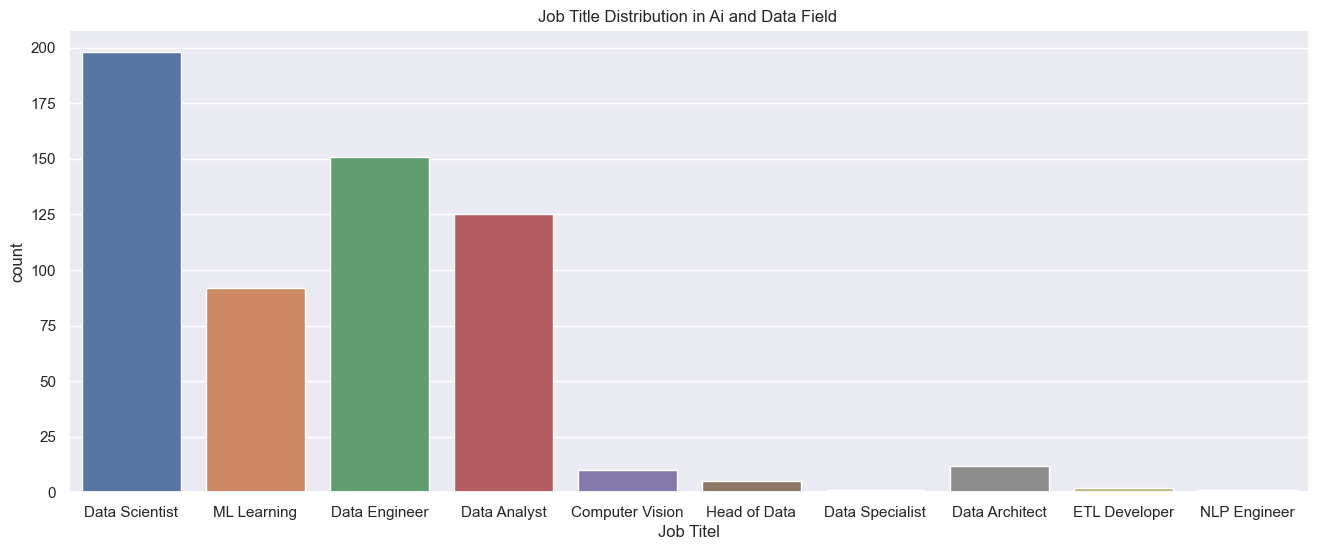

In [25]:
plt.figure(figsize=(16,6))
sns.countplot(x=df_salaries["job_title"])
plt.title("Job Title Distribution in Ai and Data Field ")
plt.xlabel("Job Titel")

Text(0.5, 1.0, 'Salaries Distribution in Ai and Data Field ')

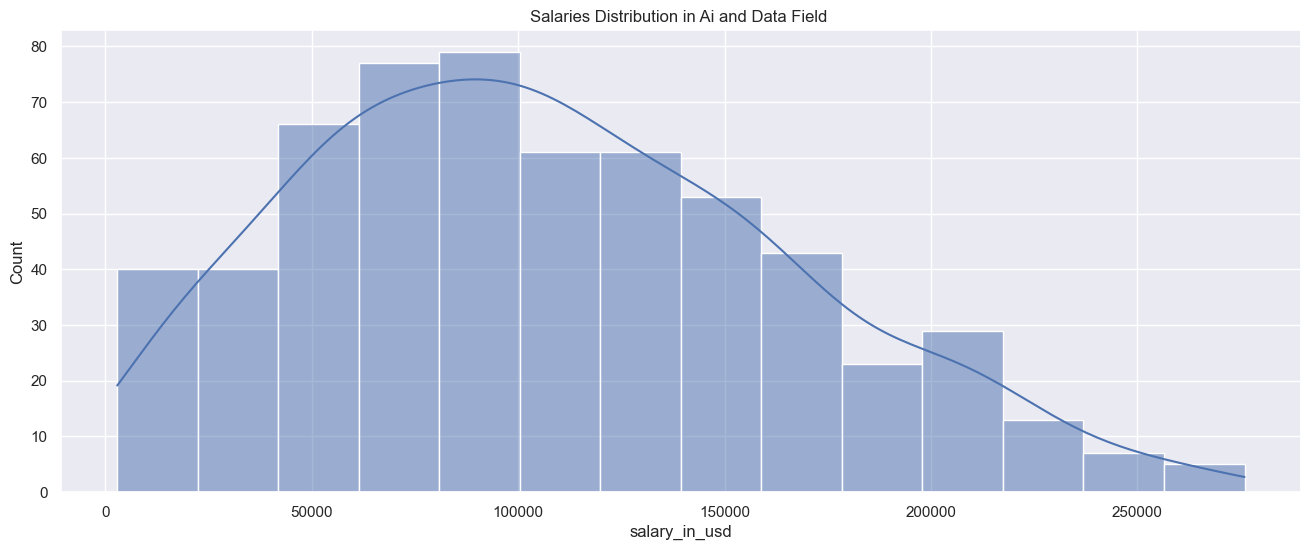

In [26]:
plt.figure(figsize=(16,6))
sns.histplot(df_salaries["salary_in_usd"],kde=True)
plt.title("Salaries Distribution in Ai and Data Field ")


Text(0.5, 12.44444444444443, 'Experience level')

<Figure size 1600x1200 with 0 Axes>

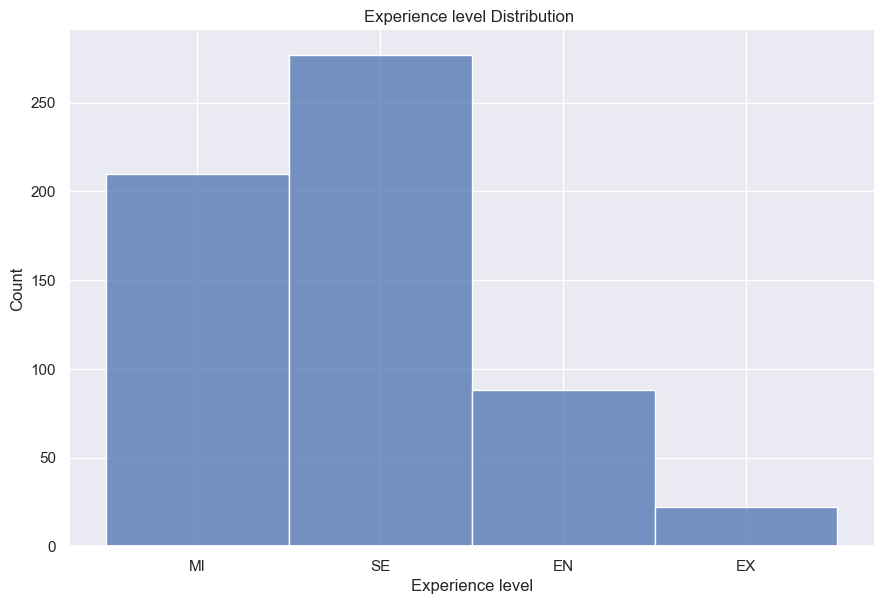

In [27]:
plt.figure(figsize=(16,12))
sns.displot(df_salaries["experience_level"],height=6,aspect=1.5)
plt.title("Experience level Distribution ")
plt.xlabel("Experience level")

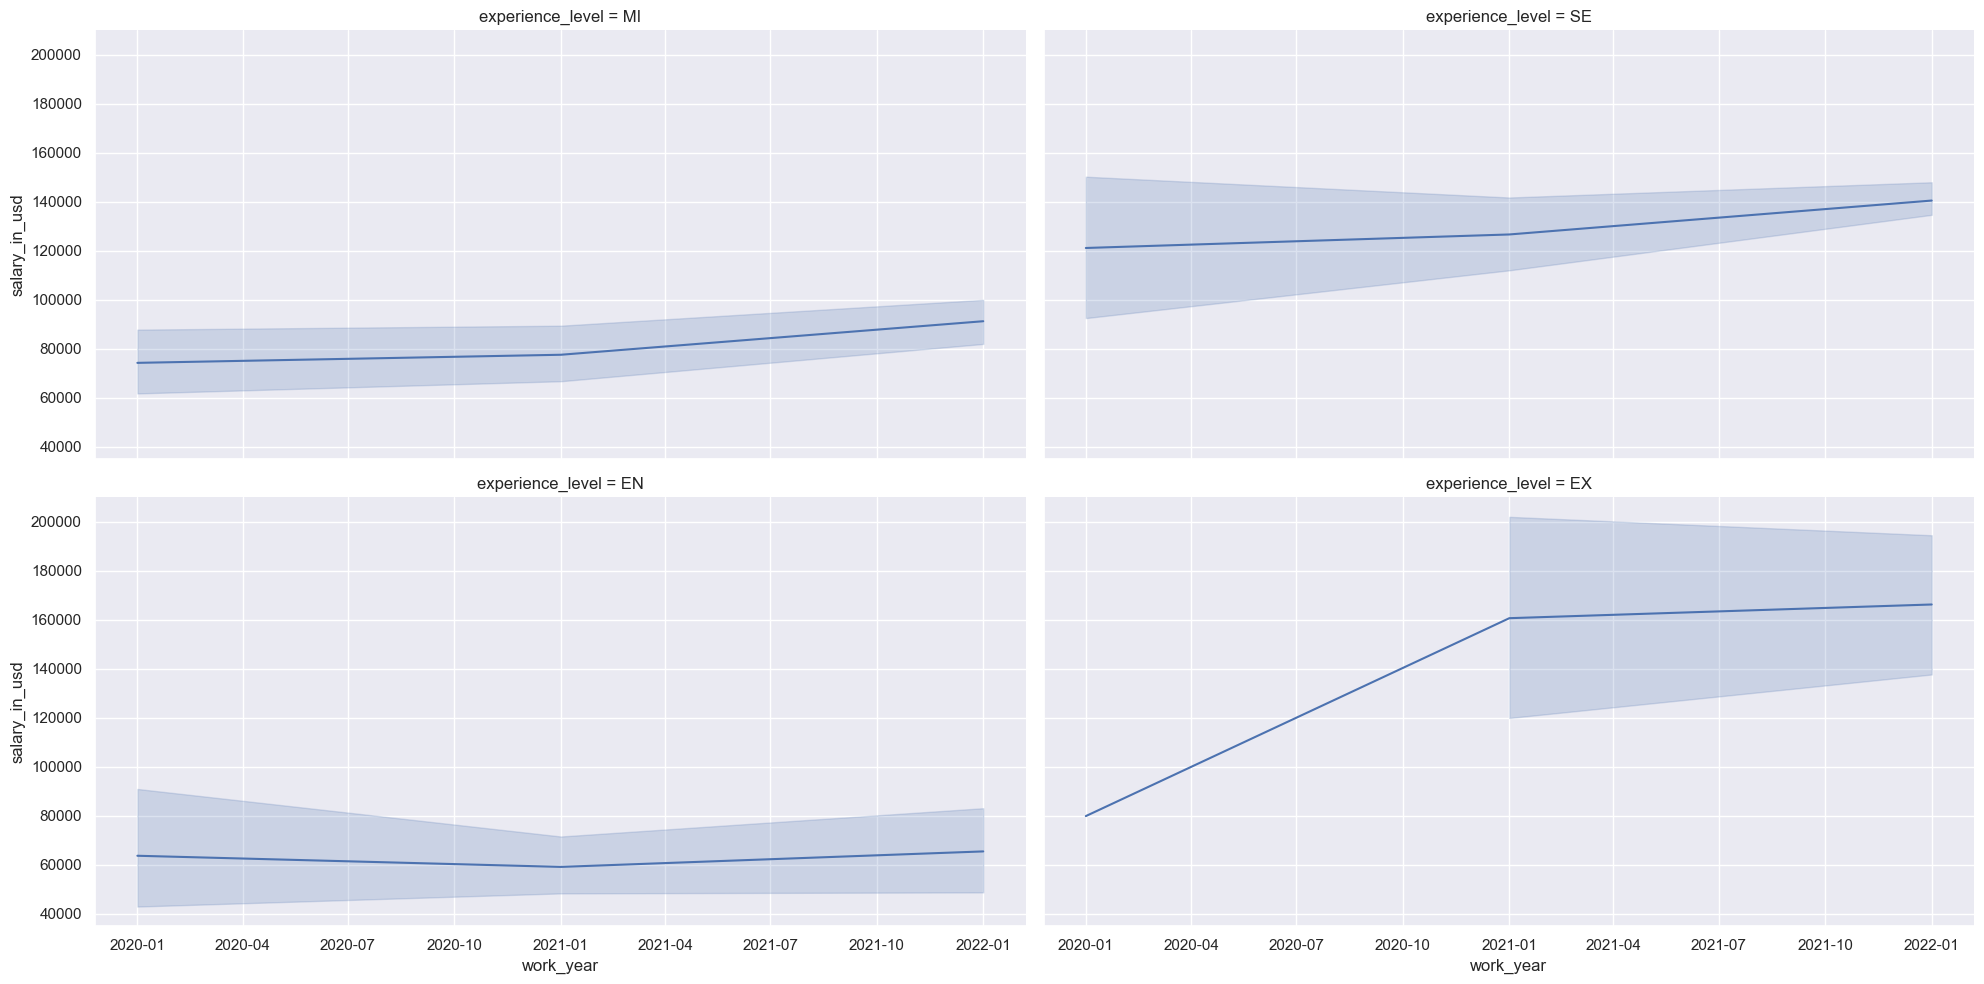

In [28]:


v=sns.FacetGrid(df_salaries,col="experience_level",col_wrap=2,height=5,aspect=2)

v.map(sns.lineplot,"work_year","salary_in_usd")


In [29]:
salary_bycompany=df_salaries.groupby("company_location")[["salary_in_usd"]].mean()
sor_sala_com=salary_bycompany.sort_values(by="salary_in_usd",ascending=False).round().rename(columns={"salary_in_usd": "total salary spend in $"})
sor_sala_com[:10]

,total salary spend in $
company_location,
RU,157500.0
US,136100.0
NZ,125000.0
IL,119059.0
JP,114127.0
AU,108043.0
AE,100000.0
DZ,100000.0
IQ,100000.0


Text(0, 0.5, 'Salary in USD ($) ')

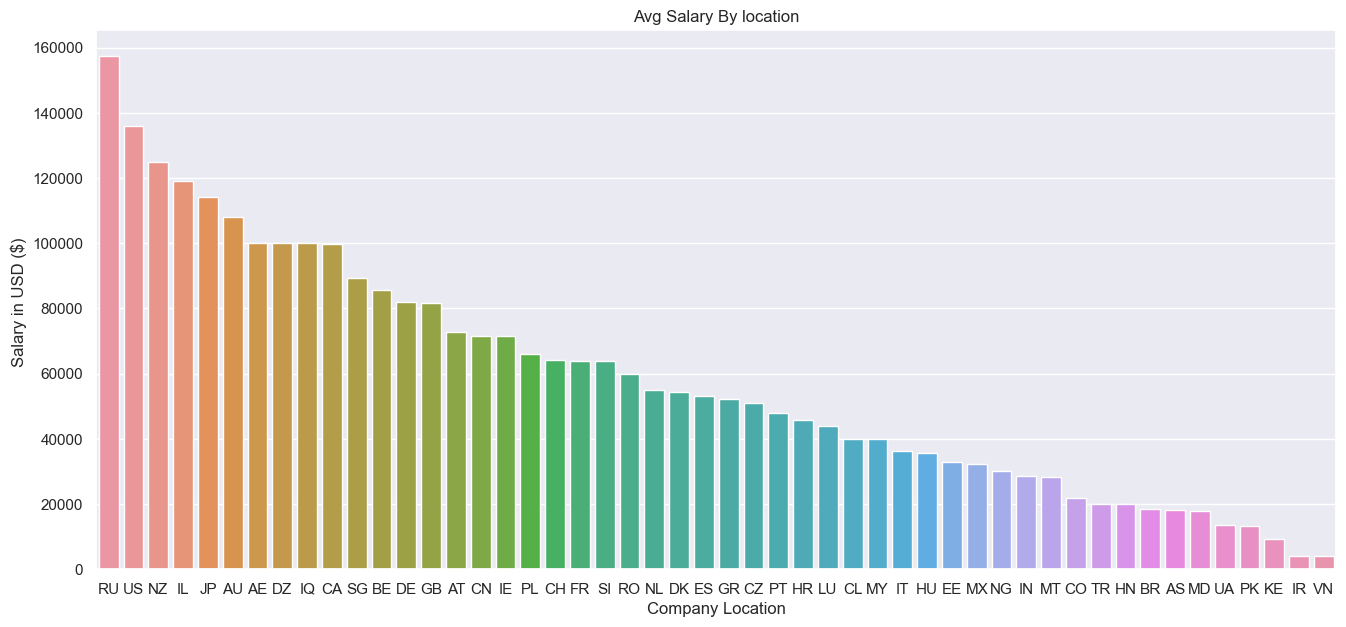

In [31]:
plt.figure(figsize=(16,7))
sns.barplot(x=sor_sala_com.index,y=sor_sala_com["total salary spend in $"])
plt.title("Avg Salary By location")
plt.xlabel("Company Location")
plt.ylabel("Salary in USD ($) ")

In [32]:
df_salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'correct_job'],
      dtype='object')

Text(0.5, 0, 'Kind of position')

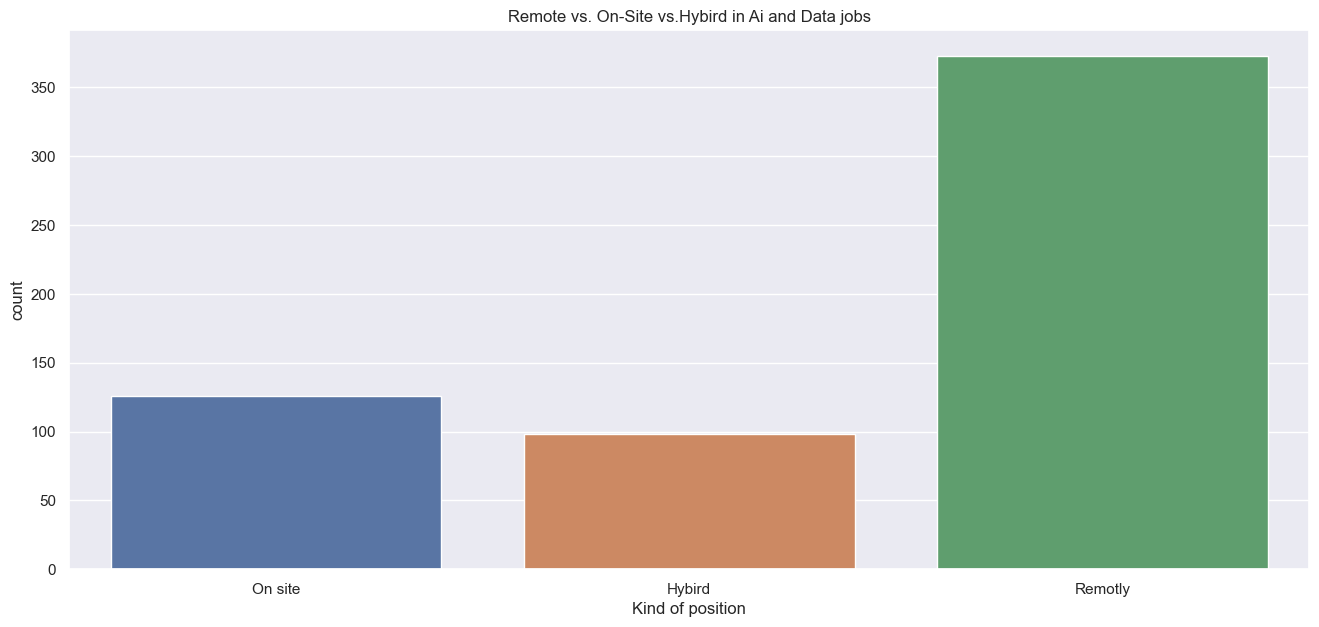

In [33]:
new_labels = ['On site', 'Hybird', 'Remotly']  


plt.figure(figsize=(16,7))
sns.countplot(x=df_salaries["remote_ratio"],).set_xticklabels(new_labels)
plt.title("Remote vs. On-Site vs.Hybird in Ai and Data jobs")
plt.xlabel("Kind of position")


In [34]:
high_currency=df_salaries.groupby("salary_currency")[["salary_in_usd"]].mean()
sor_high_currency=high_currency.sort_values(by="salary_in_usd",ascending=False).round().rename(columns={"salary_in_usd": "total spend by currency"})
sor_high_currency[:10]


,total spend by currency
salary_currency,
USD,130016.0
CHF,122346.0
SGD,104176.0
CAD,97223.0
AUD,87064.0
GBP,81671.0
EUR,65751.0
JPY,60921.0
CNY,40284.0


Text(0, 0.5, 'Expenditure in USD ($) ')

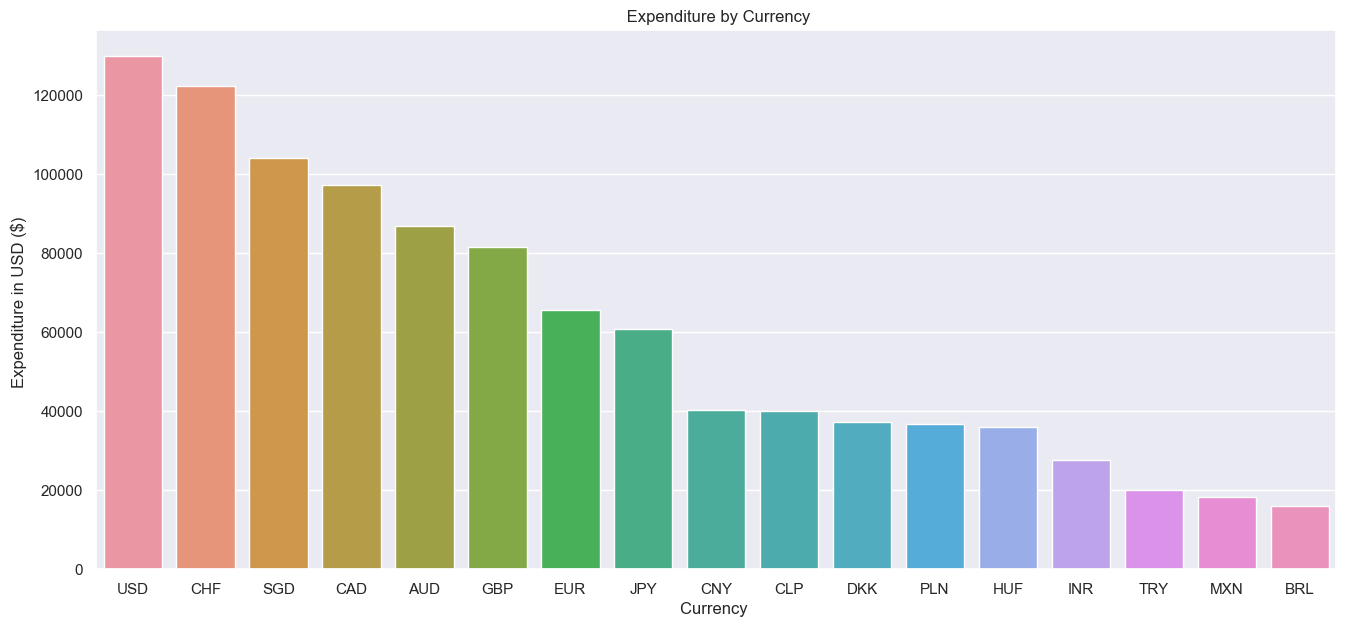

In [36]:
plt.figure(figsize=(16,7))
sns.barplot(x=sor_high_currency.index,y=sor_high_currency["total spend by currency"])
plt.title(" Expenditure by Currency")
plt.xlabel("Currency ")
plt.ylabel("Expenditure in USD ($) ")

In [37]:
## We will work with company size
 ##  عدد الشركات من حيث الحجم
 ## الشركات متركزه فين وفين 
 ## الشركات بتدفع كام 

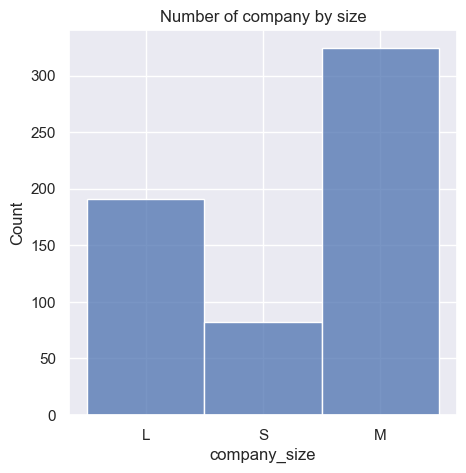

In [38]:
plt.figure(figsize=(5,5))
sns.histplot(df_salaries["company_size"])
plt.title("Number of company by size")
plt.show()


In [39]:
pd.crosstab(index=df_salaries["work_year"],columns=df_salaries["company_size"])

company_size,L,M,S
work_year,,,
2020-01-01,31,13,25
2021-01-01,116,53,44
2022-01-01,44,258,13


In [40]:
x=pd.crosstab(index=df_salaries["company_location"],columns=df_salaries["company_size"])
x.sort_values(by="M",ascending=False)[:10]


company_size,L,M,S
company_location,,,
US,99,216,30
GB,11,31,5
CA,11,16,3
ES,3,9,2
GR,1,9,1
DE,12,9,7
IN,13,7,4
FR,6,6,3
PK,1,2,0


In [41]:
df_salaries.groupby(df_salaries["company_size"])[["salary_in_usd"]].sum().rename(columns={"salary_in_usd": "Total spend in $"})

,Total spend in $
company_size,
L,20615113
M,37337182
S,6027512


In [42]:
df_salaries.groupby(df_salaries["company_size"],)[["employee_residence"]].count().rename(columns={"employee_residence": "Residence_Count"})

,Residence_Count
company_size,
L,191
M,324
S,82


In [43]:
pd.crosstab(index=df_salaries["employee_residence"],columns=df_salaries["company_size"]).sort_values(by="M",ascending=False)[:10]

company_size,L,M,S
employee_residence,,,
US,93,209,20
GB,12,30,2
CA,9,17,3
ES,3,11,1
GR,3,9,1
DE,11,8,6
IN,17,7,6
FR,5,7,6
PK,2,4,0
